# Categorical Predictability

A large portion of clinical data is categorical, meaning the data is not numerical.  These categorical features can often be highly dependent on one another; for instance, in the AE table, if AETERM is FEVER then it is likely that AESER is N (fevers are not often serious adverse events). This notebook explores how well a categorical column can be predicted from a nother column.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
def sfl_defaults():
	plt.style.use('classic')
	plt.rcParams['figure.figsize'] = [8.0, 5.0]
	plt.rcParams['figure.facecolor']='w'

	# text size
	plt.rcParams['xtick.labelsize']=14
	plt.rcParams['ytick.labelsize']=14
	plt.rcParams['axes.labelsize']=15
	plt.rcParams['axes.titlesize']=16
	plt.rcParams['legend.fontsize']=12

	# grids
	plt.rcParams['grid.color'] = 'k'
	plt.rcParams['grid.linestyle'] = ':'
	plt.rcParams['grid.linewidth'] = 0.5

	# 
	print('SFL style loaded...')
    
sfl_defaults()

## Adverse Events

This code loads in the AE data (from csv files) and computes the predicatability of various categorical columns. 

In [ ]:
df=pd.read_csv('c10_raw_ae.csv')

content_columns=df.columns[32:]

from itertools import combinations
import numpy as np

correlations={}
errors=[]

for col1_name, col2_name in combinations(content_columns,2):
    if df.dtypes[col1_name] != 'O' or df.dtypes[col2_name] != 'O' or col1_name in dates or col2_name in dates:
        pass
    else:
        counts=dict(df[[col1_name,col2_name]].apply(tuple,axis=1).value_counts())
        
        col1_values=df[col1_name].unique()
        col2_values=df[col2_name].unique()

        heat_mat=np.zeros((col1_values.shape[0],col2_values.shape[0]))


        for idx1,col1 in enumerate(col1_values):
            for idx2,col2 in enumerate(col2_values):
                if (col1,col2) in counts:
                    heat_mat[idx1][idx2]=counts[(col1,col2)]


        row_check=[row.max()/sum(row) for row in heat_mat]
        col_check=[col.max()/sum(col) for col in heat_mat.T]

        correlations[col2_name, col1_name] = sum(col_check)/len(col_check)
        correlations[col1_name, col2_name] = sum(row_check)/len(row_check)
            

cat_columns=list(set(map(lambda x: x[0],correlations.keys())))

conditional_predictability_matrix=np.zeros((len(cat_columns),len(cat_columns)))

for idx1, col1 in enumerate(cat_columns):
    for idx2, col2 in enumerate(cat_columns):
        if col1 == col2:
            conditional_predictability_matrix[idx1,idx2] = 1
        else:
            conditional_predictability_matrix[idx1,idx2]=correlations[col1,col2]
        

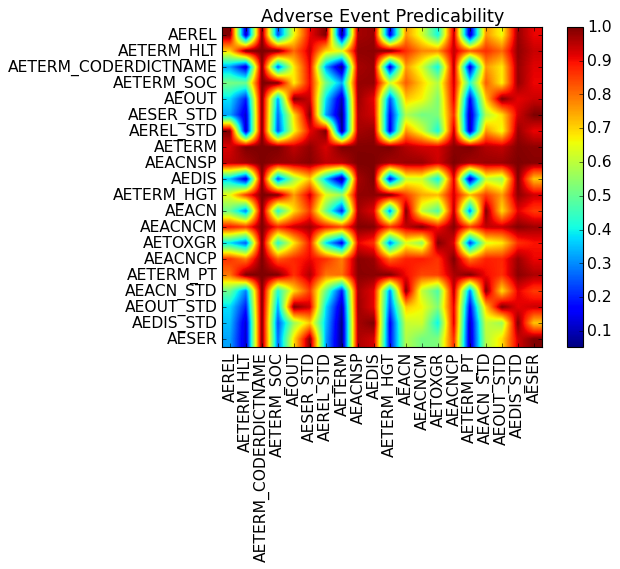

In [9]:
plt.imshow(conditional_predictability_matrix[2:,2:])
plt.xticks(list(range(len(cat_columns[2:]))),cat_columns[2:],rotation=90)
plt.yticks(list(range(len(cat_columns[2:]))),cat_columns[2:])
plt.colorbar()
plt.title('Adverse Event Predicability')
plt.show()

## Vital Signs

In addition to checking the categorical vital predictability, the correlation of various vital sign tests is also computed.

In [2]:
df=pd.read_csv('c10_raw_vitals.csv')

In [3]:
numerical=['VSHGT','VSWGHT','VSTEMP','VSHRATE','VSRRATE','VSBPS','VSBPD']

labels=['Height','Weight','Temp','Heart Rate','Resp. Rate', 'Sys. BP', 'Dys. BP']

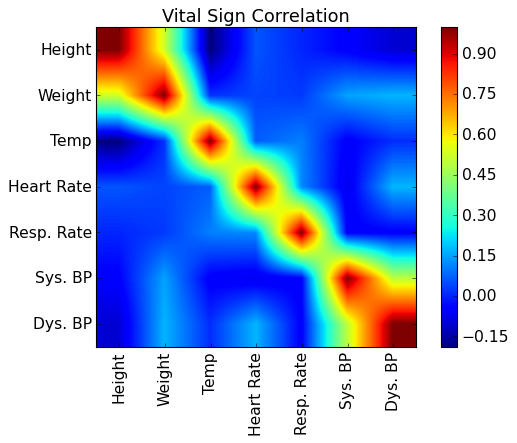

In [7]:
import matplotlib.pyplot as plt

plt.imshow(df[numerical].corr().values)
plt.xticks(list(range(7)),labels,rotation=90)
plt.yticks(list(range(7)), labels)
plt.colorbar()
plt.title('Vital Sign Correlation')
plt.show()

In [30]:
dates=list(filter(lambda x: 'DAT' in x, df.columns))

correlations={}
errors=[]

for col1_name, col2_name in combinations(df.columns,2):
    if df.dtypes[col1_name] != 'O' or df.dtypes[col2_name] != 'O' or col1_name in dates or col2_name in dates:
        pass
    else:
        counts=dict(df[[col1_name,col2_name]].apply(tuple,axis=1).value_counts())
        
        col1_values=df[col1_name].unique()
        col2_values=df[col2_name].unique()

        heat_mat=np.zeros((col1_values.shape[0],col2_values.shape[0]))


        for idx1,col1 in enumerate(col1_values):
            for idx2,col2 in enumerate(col2_values):
                if (col1,col2) in counts:
                    heat_mat[idx1][idx2]=counts[(col1,col2)]


        row_check=[row.max()/sum(row) for row in heat_mat]
        col_check=[col.max()/sum(col) for col in heat_mat.T]

        correlations[col2_name, col1_name] = sum(col_check)/len(col_check)
        correlations[col1_name, col2_name] = sum(row_check)/len(row_check)
            

cat_columns=set(map(lambda x: x[0],correlations.keys()))

conditional_predictability_matrix=np.zeros((len(cat_columns),len(cat_columns)))

for idx1, col1 in enumerate(cat_columns):
    for idx2, col2 in enumerate(cat_columns):
        if col1 == col2:
            conditional_predictability_matrix[idx1,idx2] = 1
        else:
            conditional_predictability_matrix[idx1,idx2]=correlations[col1,col2]

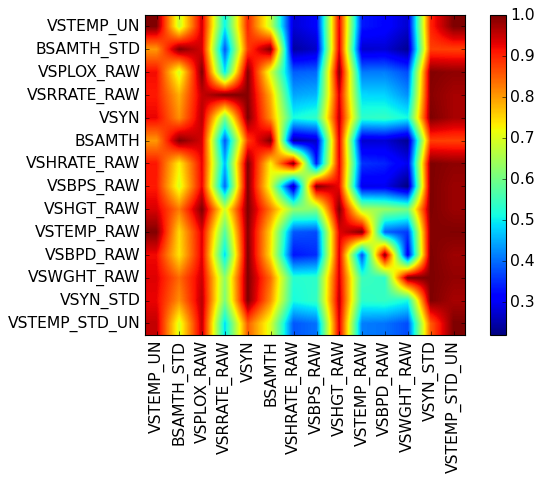

In [31]:
plt.imshow(conditional_predictability_matrix)
plt.xticks(list(range(len(cat_columns))),cat_columns,rotation=90)
plt.yticks(list(range(len(cat_columns))),cat_columns)
plt.colorbar()